In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_toLoad = "data/mouse_drug_data.csv"
clinical_toLoad = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_toLoad)
clinical = pd.read_csv(clinical_toLoad)

# Combine the data into a single dataset
trials = pd.merge(mouse, clinical, on = "Mouse ID", how = "inner")

# Remove treatments other than Capomulin, Infubinol, Ketapril, and Placebo
trials = trials.loc[trials["Drug"].isin(["Capomulin", "Infubinol", "Ketapril", "Placebo"]), :]

# Display the data table for preview
trials.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
trialsGroups = trials.groupby(["Drug", "Timepoint"])
tumorMeans = trialsGroups["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumorMeans = pd.DataFrame(tumorMeans)

# Preview DataFrame
tumorMeans = tumorMeans.reset_index()
tumorMeans.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumorErrors = trialsGroups["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumorErrors = pd.DataFrame(tumorErrors)

# Preview DataFrame
tumorErrors = tumorErrors.reset_index()
tumorErrors.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumorPivot = tumorMeans.pivot(index = "Timepoint",
                             columns = "Drug",
                             values = "Tumor Volume (mm3)")
tErrorsPivot = tumorErrors.pivot(index = "Timepoint",
                             columns = "Drug",
                             values = "Tumor Volume (mm3)")

# Preview that Reformatting worked
tumorPivot.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


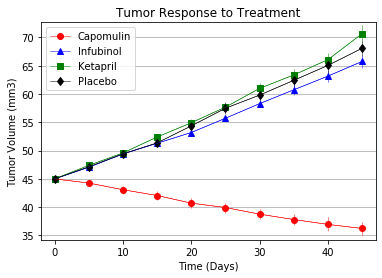

In [5]:
# Add error plots for each drug
plt.errorbar(tumorPivot.index, tumorPivot["Capomulin"], color = "red", 
             yerr = tErrorsPivot["Capomulin"], linewidth = 0.5)
plt.errorbar(tumorPivot.index, tumorPivot["Infubinol"], color = "blue", 
             yerr = tErrorsPivot["Infubinol"], linewidth = 0.5)
plt.errorbar(tumorPivot.index, tumorPivot["Ketapril"], color = "green", 
             yerr = tErrorsPivot["Ketapril"], linewidth = 0.5)
plt.errorbar(tumorPivot.index, tumorPivot["Placebo"], color = "black", 
             yerr = tErrorsPivot["Placebo"], linewidth = 0.5)

# Plot the line chart for each drug
capomulin, = plt.plot(tumorPivot.index, tumorPivot["Capomulin"], color = "red", label = "Capomulin", 
                      marker = "o", linewidth = 0.5)
infubinol, = plt.plot(tumorPivot.index, tumorPivot["Infubinol"], color = "blue", label = "Infubinol", 
                      marker = "^", linewidth = 0.5)
ketapril, = plt.plot(tumorPivot.index, tumorPivot["Ketapril"], color = "green", label = "Ketapril", 
                     marker = "s", linewidth = 0.5)
placebo, = plt.plot(tumorPivot.index, tumorPivot["Placebo"], color = "black", label = "Placebo", 
                    marker = "d", linewidth = 0.5)

# Add formatting to the chart
plt.grid(axis = "y")
plt.ylim(tumorMeans["Tumor Volume (mm3)"].min() - 2, tumorMeans["Tumor Volume (mm3)"].max() + 2)
plt.xlim(tumorMeans["Timepoint"].min() - 2, tumorMeans["Timepoint"].max() + 2)
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")

# Create a legend for the chart
plt.legend(handles=[capomulin, infubinol, ketapril, placebo], loc="best")

# Save the figure
plt.savefig("images/TreatmentResponse.png")

# Display the plot
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastaticMeans = trialsGroups["Metastatic Sites"].mean()

# Convert to DataFrame
metastaticMeans = pd.DataFrame(metastaticMeans)

# Preview DataFrame
metastaticMeans = metastaticMeans.reset_index()
metastaticMeans.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastaticErrors = trialsGroups["Metastatic Sites"].sem()

# Convert to DataFrame
metastaticErrors = pd.DataFrame(metastaticErrors)

# Preview DataFrame
metastaticErrors = metastaticErrors.reset_index()
metastaticErrors.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
metastaticPivot = metastaticMeans.pivot(index = "Timepoint",
                                       columns = "Drug",
                                       values = "Metastatic Sites")
mErrorsPivot = metastaticErrors.pivot(index = "Timepoint",
                                     columns = "Drug",
                                     values = "Metastatic Sites")

# Preview that Reformatting worked
metastaticPivot.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


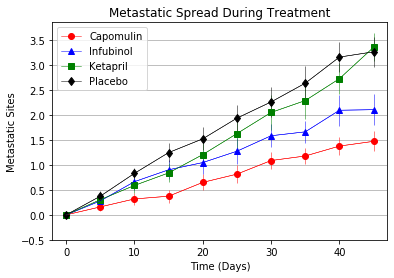

In [9]:
# Add error plots for each drug
plt.errorbar(metastaticPivot.index, metastaticPivot["Capomulin"], color = "red", 
             yerr = mErrorsPivot["Capomulin"], linewidth = 0.5)
plt.errorbar(metastaticPivot.index, metastaticPivot["Infubinol"], color = "blue", 
             yerr = mErrorsPivot["Infubinol"], linewidth = 0.5)
plt.errorbar(metastaticPivot.index, metastaticPivot["Ketapril"], color = "green", 
             yerr = mErrorsPivot["Ketapril"], linewidth = 0.5)
plt.errorbar(metastaticPivot.index, metastaticPivot["Placebo"], color = "black", 
             yerr = mErrorsPivot["Placebo"], linewidth = 0.5)

# Plot the line chart for each drug
capomulin, = plt.plot(metastaticPivot.index, metastaticPivot["Capomulin"], color = "red", label = "Capomulin", 
                      marker = "o", linewidth = 0.5)
infubinol, = plt.plot(metastaticPivot.index, metastaticPivot["Infubinol"], color = "blue", label = "Infubinol", 
                      marker = "^", linewidth = 0.5)
ketapril, = plt.plot(metastaticPivot.index, metastaticPivot["Ketapril"], color = "green", label = "Ketapril", 
                     marker = "s", linewidth = 0.5)
placebo, = plt.plot(metastaticPivot.index, metastaticPivot["Placebo"], color = "black", label = "Placebo", 
                    marker = "d", linewidth = 0.5)

# Add formatting to the chart
plt.grid(axis = "y")
plt.ylim(metastaticMeans["Metastatic Sites"].min() - 0.5, metastaticMeans["Metastatic Sites"].max() + 0.5)
plt.xlim(metastaticMeans["Timepoint"].min() - 2, metastaticMeans["Timepoint"].max() + 2)
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")
plt.title("Metastatic Spread During Treatment")

# Create a legend for the chart
plt.legend(handles=[capomulin, infubinol, ketapril, placebo], loc="best")

# Save the figure
plt.savefig("images/MetastaticSpread.png")

# Display the plot
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint
mouseCounts = trialsGroups["Mouse ID"].count()

# Convert to DataFrame
mouseCounts = pd.DataFrame(mouseCounts)

# Preview DataFrame
mouseCounts = mouseCounts.reset_index()
mouseCounts.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
mousePivot = mouseCounts.pivot(index = "Timepoint",
                              columns = "Drug",
                              values = "Mouse ID")

mouseSurvival = mousePivot
for drug in mouseSurvival.columns:
    mouseSurvival[drug] = 100 * (mouseSurvival[drug] / mouseSurvival[drug].iloc[0])


# Preview the Data Frame
mouseSurvival.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0


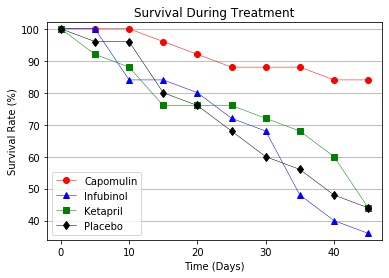

In [12]:
# Plot the line chart for each drug
capomulin, = plt.plot(mouseSurvival.index, mouseSurvival["Capomulin"], color = "red", label = "Capomulin", 
                      marker = "o", linewidth = 0.5)
infubinol, = plt.plot(mouseSurvival.index, mouseSurvival["Infubinol"], color = "blue", label = "Infubinol", 
                      marker = "^", linewidth = 0.5)
ketapril, = plt.plot(mouseSurvival.index, mouseSurvival["Ketapril"], color = "green", label = "Ketapril", 
                     marker = "s", linewidth = 0.5)
placebo, = plt.plot(mouseSurvival.index, mouseSurvival["Placebo"], color = "black", label = "Placebo", 
                    marker = "d", linewidth = 0.5)

# Add formatting to the chart
plt.grid(axis = "y")
plt.ylim(mouseSurvival.min().min() - 2, mouseSurvival.max().max() + 2)
plt.xlim(mouseSurvival.index.min() - 2, mouseSurvival.index.max() + 2)
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival During Treatment")

# Create a legend for the chart
plt.legend(handles=[capomulin, infubinol, ketapril, placebo], loc="best")

# Save the figure
plt.savefig("images/SurvivalRate.png")

# Display the plot
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
pctChange = pd.DataFrame({"Drug": [drug for drug in tumorPivot.columns],
                          "Percent Change": [100 * (tumorPivot[drug].iloc[-1] - tumorPivot[drug].iloc[0]) /\
                                             tumorPivot[drug].iloc[0] for drug in tumorPivot.columns]})

# Display the data to confirm
pctChange

,Drug,Percent Change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


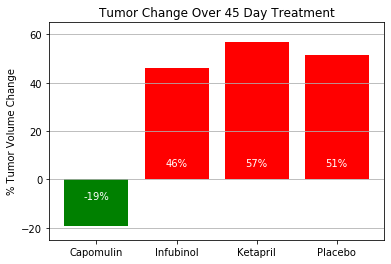

In [14]:
# Splice the data between passing and failing drugs
bins = [-float("inf"), 0, float("inf")]
group_names = ["Passed", "Failed"]

pctChange["Status"] = pd.cut(pctChange["Percent Change"], bins , labels = group_names)

passed = pctChange.loc[pctChange["Status"] == "Passed"]
failed = pctChange.loc[pctChange["Status"] == "Failed"]

# Create bar plot
fig, ax = plt.subplots()

x = np.arange(len(pctChange))
passPlot = ax.bar(passed["Drug"], passed["Percent Change"], color = "green")
failPlot = ax.bar(failed["Drug"], failed["Percent Change"], color = "red")

# Add formatting
plt.xticks(x, (pctChange["Drug"]))
plt.yticks(np.arange(-20, 80, step = 20))
plt.ylim(-25, 65)
plt.grid(axis = "y")

plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")

# Add function for labeling
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 0 + (y_height * 0.05)
        else:
            label_position = 0 - (y_height * 0.10)
        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                "%d%%" % int(height),
                ha='center', va='bottom',
                color = 'white')
        
autolabel(passPlot, ax)
autolabel(failPlot, ax)

# Save the figure
plt.savefig("images/TumorChange.png")

# Show plot
plt.show()

## Observable Trends
- Among the considered drugs, Capomulin was the only one that resulted in a decrease in tumor volume over the 45-day treatment period
- Infubinol and Ketapril did not perform any better than the placebo treatment in terms of tumor growth or metastatic spread
- Infubinol had the worst survival rate by far, seeing a sharp dip around the 30 day mark, despite being the drug that best hindered tumor growth and metastatic spread amongst the drugs that failed.